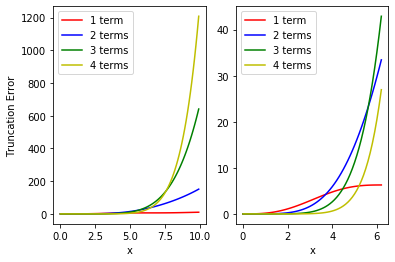

In [38]:
import numpy as np
import matplotlib.pyplot as plt


def sin_taylor(x: float, n: int) -> float:
    if n <= 0:
        return x
    return ((n % 2)*-2+1) * (x**(2*n+1)) / np.prod(np.arange(1, 2*n+2)) + sin_taylor(x, n-1)


r = np.arange(0, 10, 0.1)
r2 = np.arange(0, np.pi*2.0, 0.1)
errors = np.empty((4, r.size))
for i, v in enumerate(r):
    s = np.sin(v)
    for j in range(errors.shape[0]):
        errors[j][i] = np.abs(s - sin_taylor(v, j))

plt.subplot(1, 2, 1)
plt.plot(r, errors[0], 'r-', label='1 term')
plt.plot(r, errors[1], 'b-', label='2 terms')
plt.plot(r, errors[2], 'g-', label='3 terms')
plt.plot(r, errors[3], 'y-', label='4 terms')
plt.legend()
plt.xlabel('x')
plt.ylabel('Truncation Error')

plt.subplot(1, 2, 2)
plt.plot(r2, errors[0][:r2.size], 'r-', label='1 term')
plt.plot(r2, errors[1][:r2.size], 'b-', label='2 terms')
plt.plot(r2, errors[2][:r2.size], 'g-', label='3 terms')
plt.plot(r2, errors[3][:r2.size], 'y-', label='4 terms')
plt.legend()
plt.xlabel('x')
plt.show()

# For smaller values of x, truncation error decreases as more terms are used.
# After x=pi, this relationship starts to flip, and for larger values of x,
# truncation error increases as more terms are used. Between different numbers
# of terms, the error does not decrease uniformly for all values of x; the
# difference is close to 0 for all cases close to x=0, then widens around x=pi,
# and then past that the errors of all cases with more than one term appear to
# rise exponentially.
